## This project is a part of streamlit app development and deployment. It is aimed to predict the annual salary of software developer using machine learning techniques and learn to build a web app for the end users.

### Source of Dataset: https://insights.stackoverflow.com/survey

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("survey_results_public.csv")
df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [46]:
df = df[["Country", "EdLevel", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,NaN


### Data Preprocessing and Cleaning

In [47]:
df = df[df["Salary"].notnull()]
df = df[df["EdLevel"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,194400.0


In [48]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [49]:
df['Country'].value_counts()

United States of America                                8684
Germany                                                 2901
United Kingdom of Great Britain and Northern Ireland    2649
India                                                   2155
Canada                                                  1478
                                                        ... 
Fiji                                                       1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 159, dtype: int64

In [51]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [52]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10330
United States of America                                 8684
Germany                                                  2901
United Kingdom of Great Britain and Northern Ireland     2649
India                                                    2155
Canada                                                   1478
France                                                   1372
Brazil                                                   1279
Spain                                                     993
Poland                                                    973
Netherlands                                               897
Australia                                                 830
Italy                                                     807
Sweden                                                    664
Russian Federation                                        533
Switzerland                                               520
Turkey  

In [53]:
df['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Other',
       'Netherlands', 'United States of America', 'Austria', 'Italy',
       'Canada', 'Germany', 'Poland', 'France', 'Brazil', 'Sweden',
       'Spain', 'Turkey', 'India', 'Russian Federation', 'Switzerland',
       'Australia'], dtype=object)

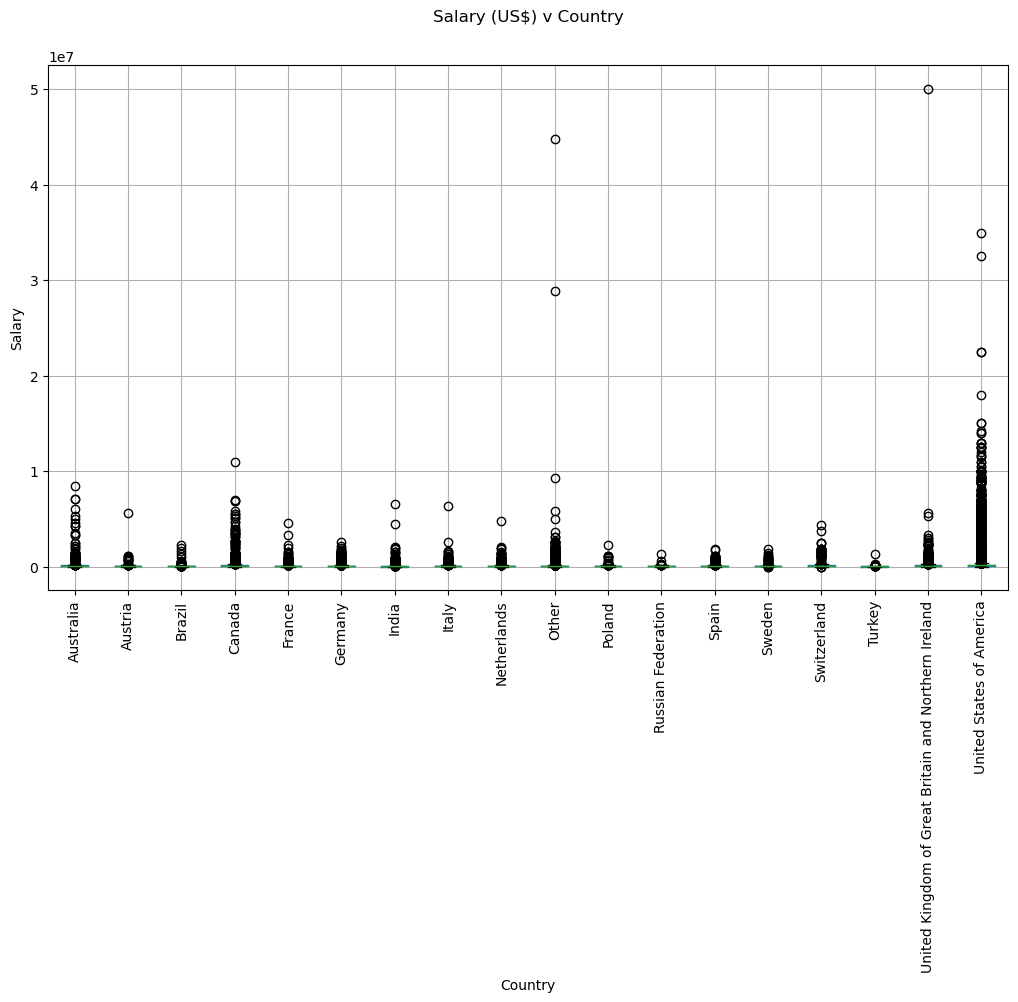

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [55]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

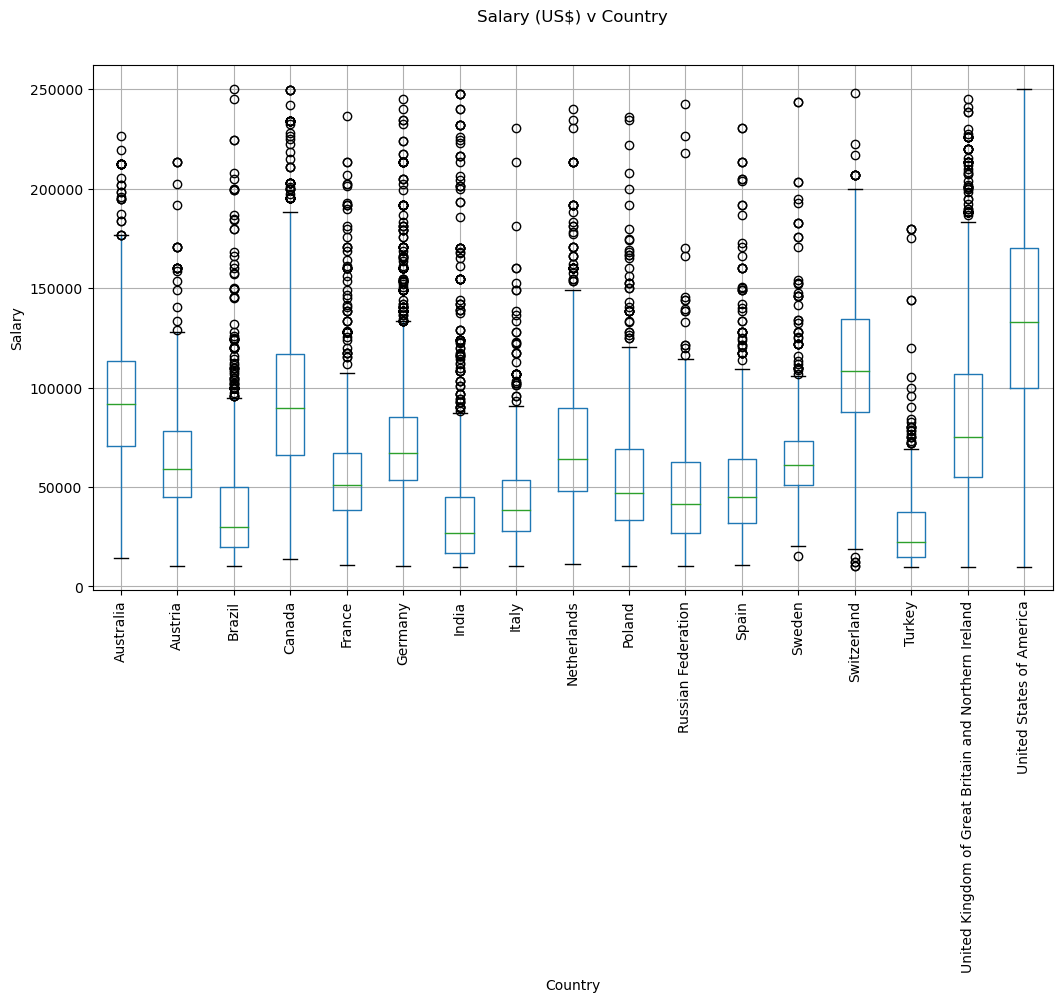

In [56]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [57]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '10', '22', '4', '20', '9', '14', '21', '15', '25',
       '3', '8', '12', '7', '19', '1', '17', '24', '11', '23',
       'Less than 1 year', '18', '40', '37', '46', '13', '32', '31', '39',
       '27', '28', '16', '30', '34', '35', '26', '42', '38', '36', '41',
       '44', '29', '33', 'More than 50 years', '45', '48', '43', '50',
       '47', '49'], dtype=object)

In [58]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [59]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [60]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [61]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

In [63]:
print("EdLevel: ", df["EdLevel"].unique())
print("Country: ",  df["Country"].unique())

EdLevel:  [2 0 1 3]
Country:  [15  8 16  1  7  3  5  9  4  2 12 11 14  6 10 13  0]


### Preparation for ML Models Development

In [64]:
X = df.drop("Salary", axis=1)
# Target
y = df["Salary"]

In [65]:
# LinearRegression Model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [66]:
y_pred = linear_reg.predict(X)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$45,860.82


In [68]:
# DecisionTree Model
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [69]:
y_pred = dec_tree_reg.predict(X)

In [70]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,050.70


In [71]:
# Randomforest Model
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [72]:
y_pred = random_forest_reg.predict(X)

In [73]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$35,137.79


### Optimization with GridSearch

In [74]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [75]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$36,520.56


In [76]:
X

,Country,EdLevel,YearsCodePro
2,15,2,5.0
8,8,2,6.0
10,15,0,2.0
11,16,0,10.0
12,16,0,5.0
...,...,...,...
73114,5,1,2.0
73116,16,0,16.0
73119,16,0,1.0
73120,11,0,2.0


In [77]:
X = np.array([["United States of America", 'Master’s degree', 5]])
X

array([['United States of America', 'Master’s degree', '5']], dtype='<U24')

In [78]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[16.,  2.,  5.]])

In [79]:
y_pred = regressor.predict(X)
y_pred

array([137207.38888889])

In [80]:
import pickle

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [81]:
y_pred = regressor_loaded.predict(X)
y_pred

array([137207.38888889])